# Skaters (Season 2024/25) - Points

### Import libraries

In [36]:
import sys
import os
import pandas as pd

In [37]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [38]:
from utils import data_cleaning
from utils import distribution_analysis as da
from utils import discrete_distribution_models as ddm
from utils import correlation_analysis
from utils import hypothesis_testing
from utils import regression_analysis

### Import the dataset

In [39]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [40]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [41]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Summary Statistics

In [43]:
feature = "I_F_points"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} points.")

Top point scorer: Nikita Kucherov with 121 points.
Top point scorer in 5-on-4 situations: Nikita Kucherov with 39 points.
Top point scorer in 4-on-5 situations: Alex Tuch with 8 points.


### Data cleaning

In [44]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [45]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


In [46]:
df_points = df.drop(["playerId", "season", "name", "team"], axis=1)
data_cleaning.print_df_size(df_points)

Number of samples: 4600
Number of features: 148


### Variables and Filter

In [47]:
# Filters
situation = "all"
min_games_played = 20

# Variables
feature="I_F_points"
label="Points"
label1="Forwards"
label2="Defencemen"

# Reference player
name_player="Auston Matthews"
ref_data = df[(df["name"]==name_player) & (df["situation"]==situation)]

To focus on meaningful performance, this chart includes only skaters who played a minimum number of games.

In [48]:
df_points = df_points[(df_points["situation"] == situation) & (df_points["games_played"] >= min_games_played)]
df_points = df_points.drop(["situation"], axis=1)

values1 = df_points[df_points["position"]!="D"] # df about forwards
values1 = values1.drop(["position"], axis=1)

values2 = df_points[df_points["position"]=="D"] # df about defencemen
values2 = values2.drop(["position"], axis=1)

df_points = df_points.drop(["position"], axis=1)

## Part 01 - Univariate Analysis

### Frequency Tables

Mean: 29.961
Variance: 508.011
Standard deviation: 22.523
Mode: [7. 8.]


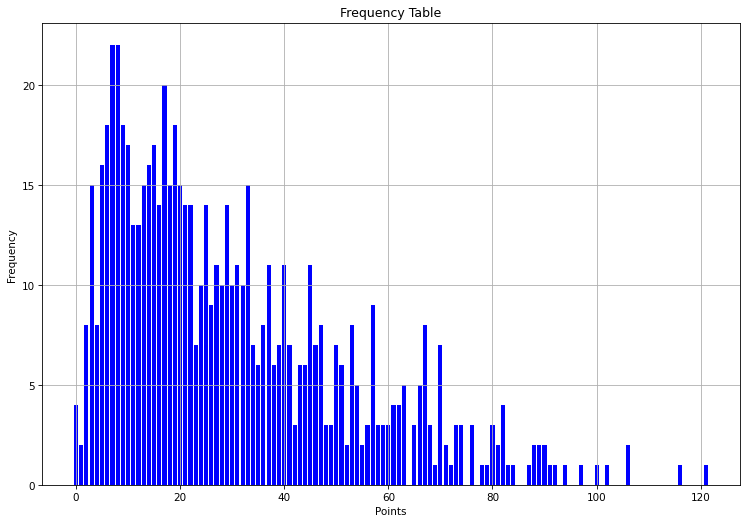

In [49]:
da.plot_ftab(df_points[feature], xlabel=label)

Cohen's effect size: 0.61


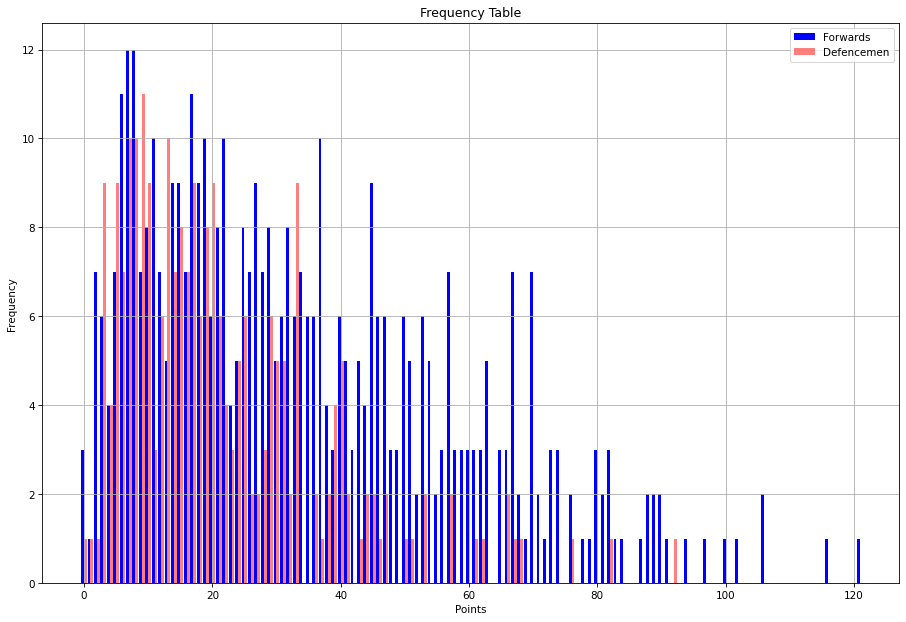

In [50]:
da.plot_two_ftabs(values1[feature], values2[feature], label1=label1, label2=label2, xlabel=label)

### Probability Mass Function

Actual PMF: 
Mean: 29.961
Variance: 507.28
Standard deviation: 22.523
Mode: 7.0
Skewness: 1.061

Observed PMF: 
Mean: 46.893
Variance: 625.37
Standard deviation: 25.007
Mode: 67.0
Skewness: 0.496


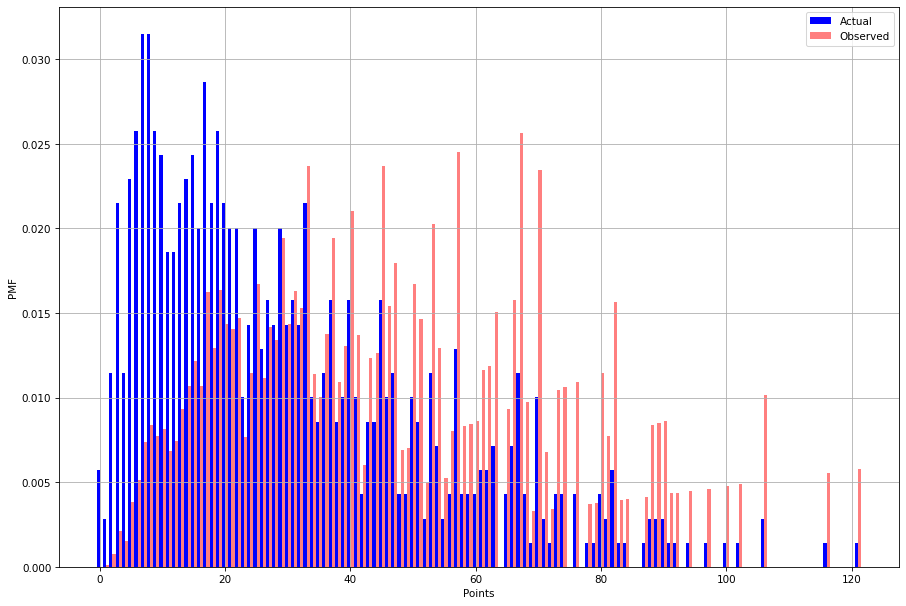

In [51]:
da.plot_pmf(df_points[feature], xlabel=label, width=0.5)

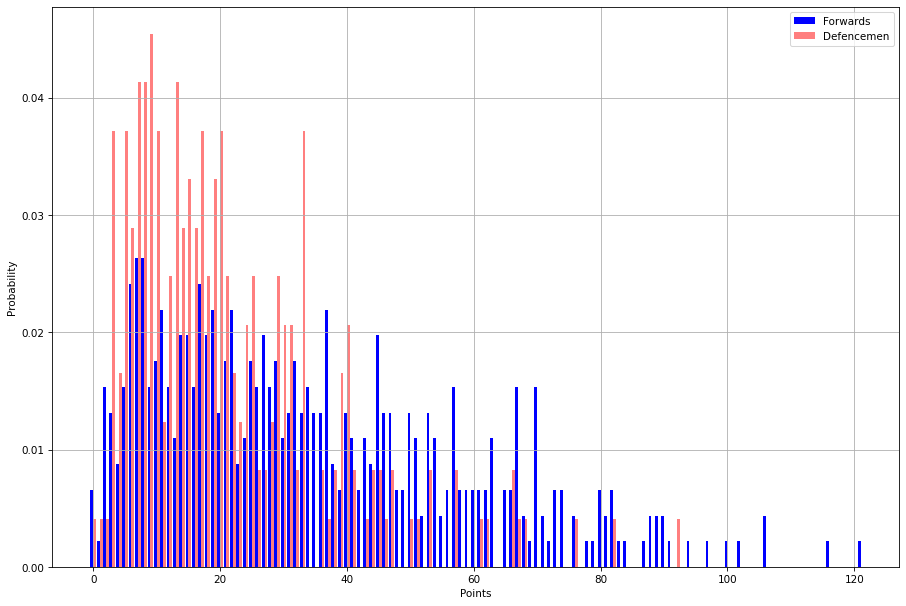

In [52]:
da.plot_two_pmfs(values1[feature], values2[feature], label1=label1, label2=label2, xlabel=label)

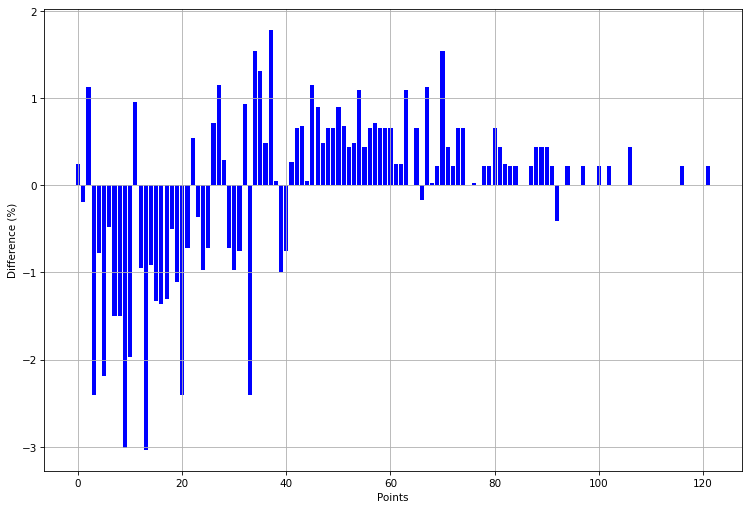

In [53]:
da.plot_diff_pmfs(values1[feature], values2[feature], label1=label1, label2=label2, xlabel=label)

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 95.85
Median: 24.00
Interquartile range: 31.00
Quartile skewness: 0.23


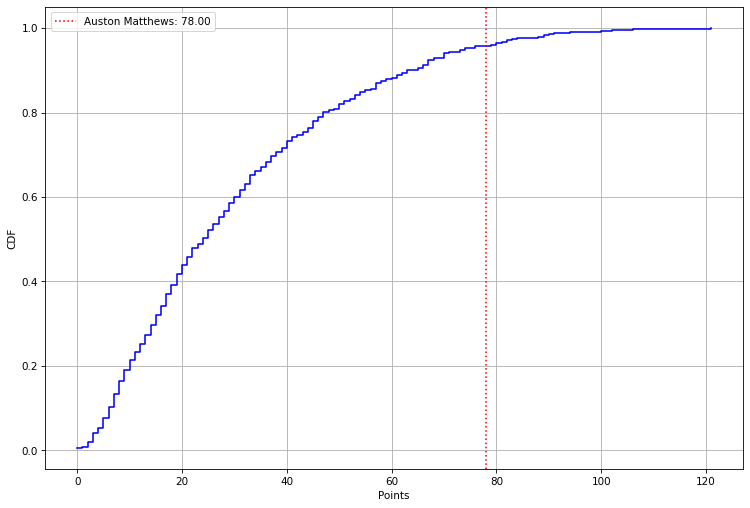

In [54]:
ref = ref_data[feature].values[0]

da.print_percentile_rank(ref, df_points[feature], label=name_player)
da.plot_cdf(ref, df_points[feature], label=name_player, xlabel=label)

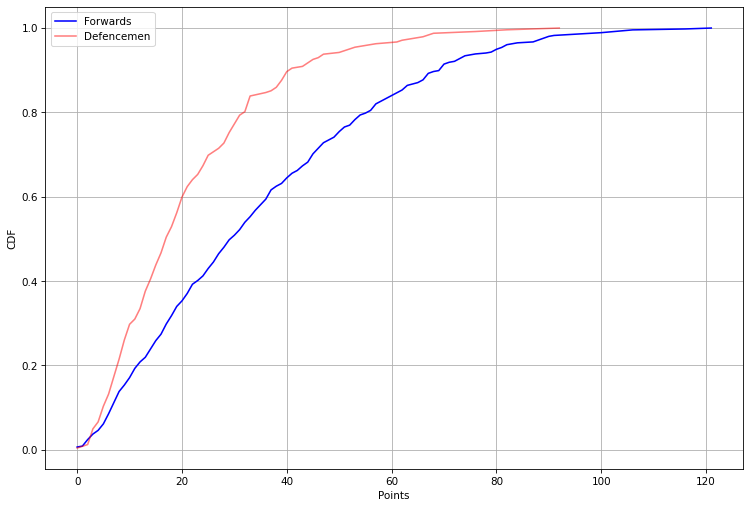

In [55]:
da.plot_two_cdfs(values1[feature], values2[feature], label1=label1, label2=label2, xlabel=label)

### Modeling Distributions

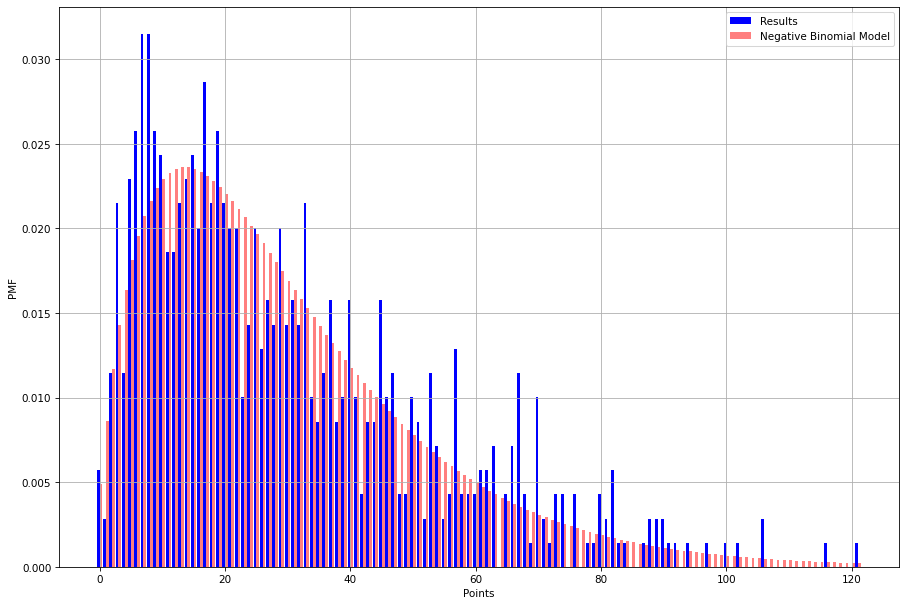

In [56]:
top_score = int(df_points[feature].max())

mean, var, r = ddm.plot_empirical_vs_nb_model(df_points[feature], range(top_score+1), xlabel=label)

### Estimation

Mean Squared Error (Mean): 0.0062
Mean Absolute Error (Mean): 0.0450
Mean Squared Error (Median): 0.0147
Mean Absolute Error (Median): 0.0630


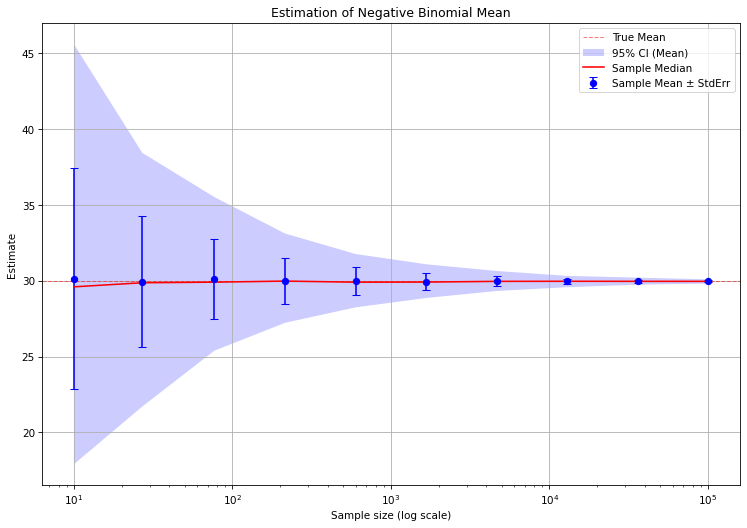

In [57]:
ddm.simulate_mean_estimation_nb(mean, r)

## Part 02 - Bivariate Analysis

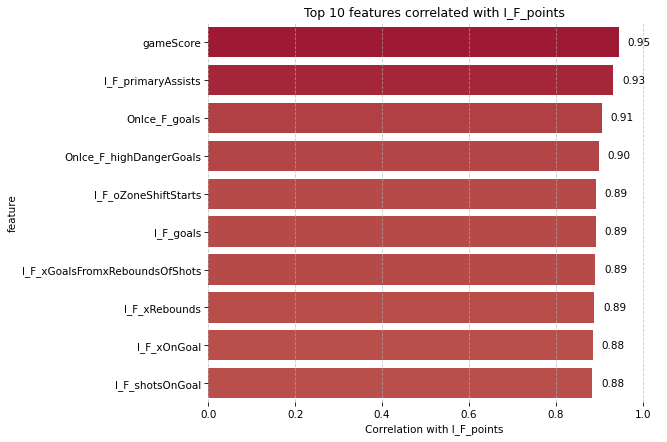

In [58]:
correlation_analysis.plot_top_correlations(df_points, feature)

In [59]:
predictor="gameScore"
target="I_F_goals"
label_pred = "Game Score"
label_target= "Points"

df_pred = df_points[predictor]
df_target = df_points[target]

### Scatter plot

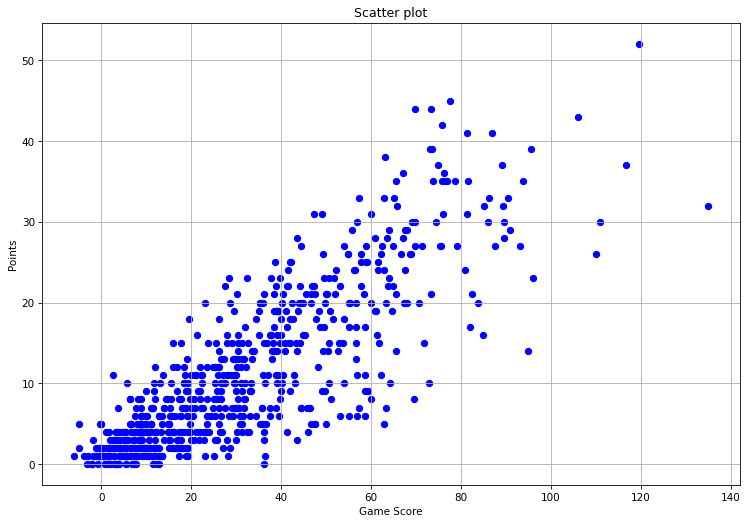

In [60]:
correlation_analysis.plot_scatter(df_pred, df_target, xlabel=label_pred, ylabel=label_target)

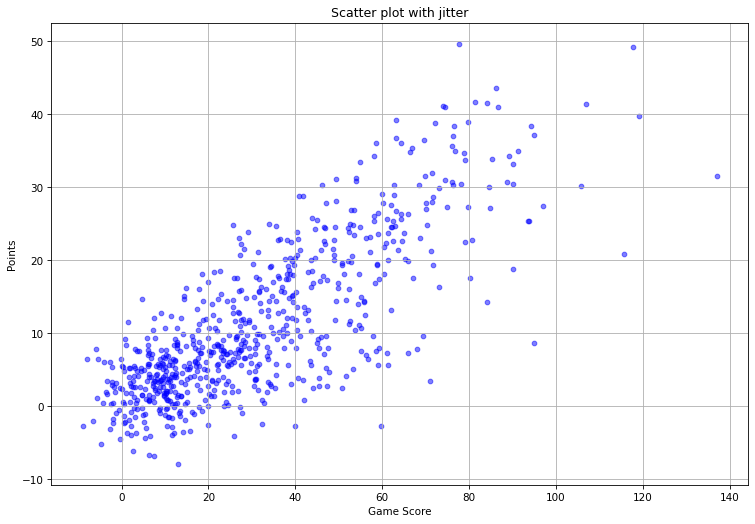

In [61]:
correlation_analysis.plot_scatter_with_jitter(df_pred, df_target, xlabel=label_pred, ylabel=label_target, alpha=0.5)

### Decile plot

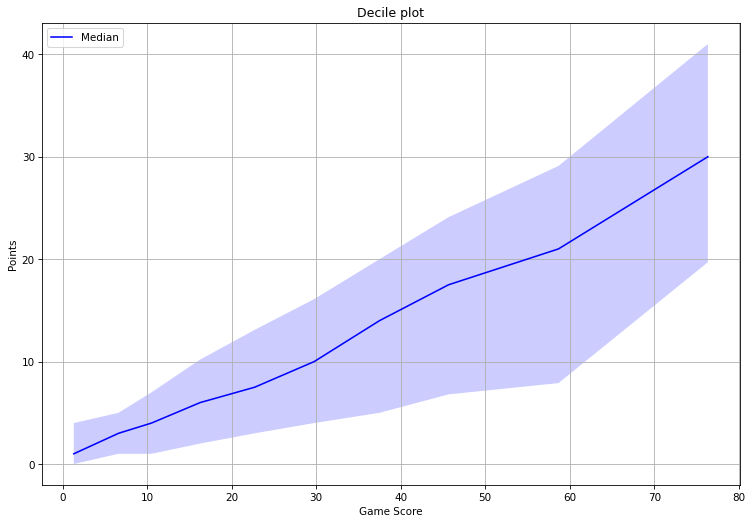

In [62]:
correlation_analysis.plot_decile(df_points, predictor, target, xlabel=label_pred, ylabel=label_target)

### Standardization and Pearson Correlation Coefficient 

Pearson correlation coefficient: 0.838


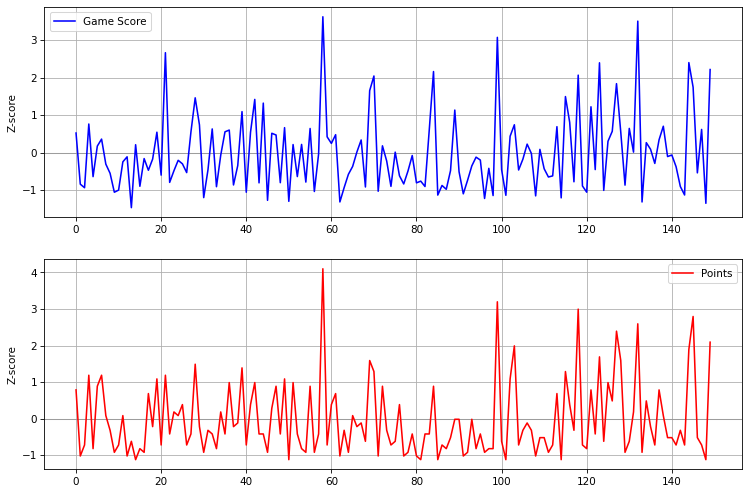

In [63]:
correlation_analysis.plot_zscore_and_corr(df_pred, df_target, 
                                          end_sample=150, 
                                          label1=label_pred, 
                                          label2=label_target)

### Rank Correlation and Spearman's Rank Correlation Coefficient

Spearman's rank correlation coefficient: 0.835


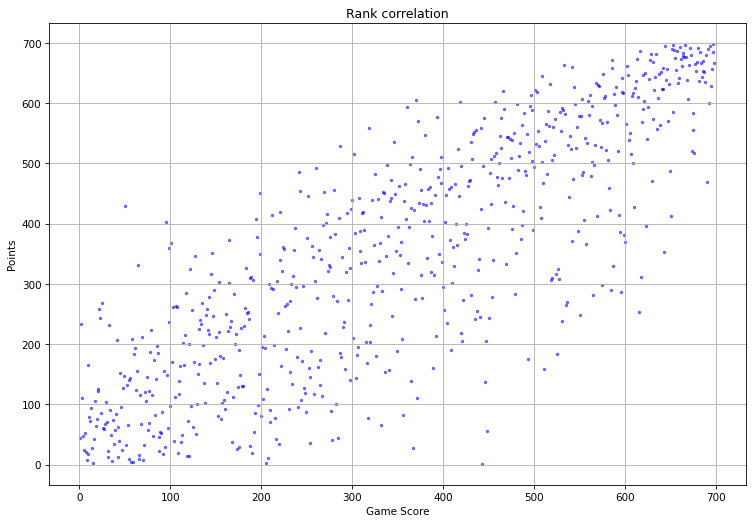

In [64]:
correlation_analysis.plot_rank_correlation(df_pred, df_target, xlabel=label_pred, ylabel=label_target)

### Least Squares Fit

                            OLS Regression Results                            
Dep. Variable:              I_F_goals   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          1.15e-185
Time:                        01:12:18   Log-Likelihood:                -2170.5
No. Observations:                 698   AIC:                             4345.
Df Residuals:                     696   BIC:                             4354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6455      0.331      1.948      0.0

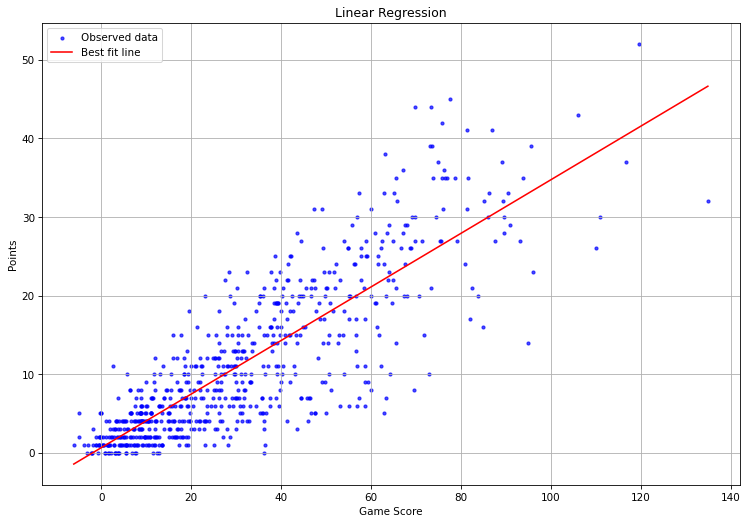

In [67]:
regression_analysis.plot_linear_regression(df_points, predictor, target, xlabel=label_pred, ylabel=label_target)

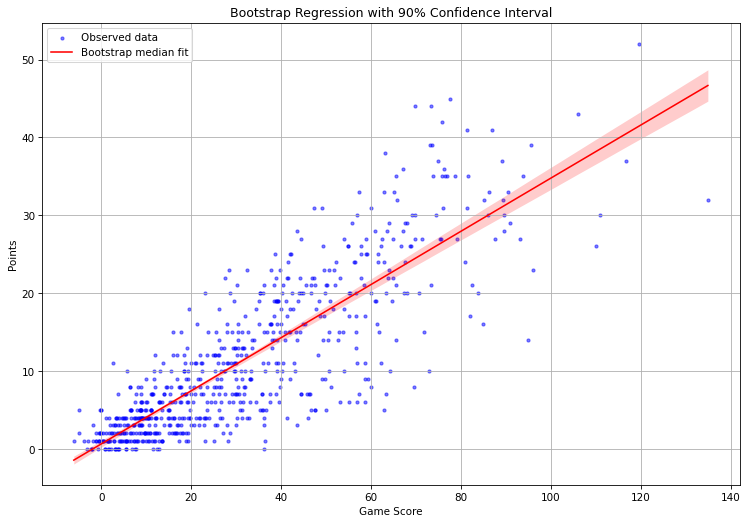

In [68]:
regression_analysis.plot_bootstrap_regression(df_points, predictor, target, xlabel=label_pred, ylabel=label_target)

## Part 03 - Multivariate Analysis

In [73]:
target = "I_F_goals"
predictors = ["OnIce_F_goals", 
              "I_F_oZoneShiftStarts", 
              "I_F_shotsOnGoal",
              "gameScore"]

df_points = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]

In [74]:
regression_analysis.multiple_regression(df_points, target, predictors)

                            OLS Regression Results                            
Dep. Variable:              I_F_goals   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     575.0
Date:                Tue, 12 Aug 2025   Prob (F-statistic):          1.83e-218
Time:                        01:16:09   Log-Likelihood:                -2083.6
No. Observations:                 698   AIC:                             4177.
Df Residuals:                     693   BIC:                             4200.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.7919 